In [1]:
# import import_ipynb
# from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
TANGARA_307A    float64
dtype: object


,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE,TANGARA_307A
DATETIME,,,,,,,,,,,
2023-11-02 00:00:30-05:00,10.0,7.0,5.0,4.0,5.0,6.0,3.0,5.0,5.0,11.0,NaN
2023-11-02 00:01:00-05:00,11.0,7.0,6.0,4.0,7.0,6.0,5.0,7.0,5.0,11.0,NaN
2023-11-02 00:01:30-05:00,10.0,7.0,6.0,4.0,6.0,7.0,4.0,9.0,4.0,11.0,NaN
2023-11-02 00:02:00-05:00,11.0,7.0,5.0,4.0,6.0,6.0,5.0,5.0,5.0,10.0,NaN
2023-11-02 00:02:30-05:00,9.0,7.0,6.0,3.0,7.0,6.0,4.0,5.0,5.0,10.0,NaN


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE,TANGARA_307A
count,2738.000000,2729.000000,2756.000000,2803.000000,2633.000000,1425.000000,2555.000000,2067.000000,2770.000000,2706.000000,1289.000000
mean,11.089116,13.335288,9.119013,8.805209,8.093430,6.725614,7.275538,7.168844,11.453430,11.552846,8.203258
std,4.423682,6.390179,4.491127,5.169008,2.436661,3.024678,2.468281,4.440315,5.753718,2.989133,3.123835
min,1.000000,0.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,1.000000,4.000000,2.000000
25%,8.000000,8.000000,5.000000,4.000000,6.000000,4.000000,6.000000,3.000000,7.000000,10.000000,6.000000
50%,10.000000,13.000000,9.000000,9.000000,8.000000,6.000000,7.000000,6.000000,11.000000,12.000000,8.000000
75%,14.000000,18.000000,12.000000,12.000000,10.000000,9.000000,9.000000,11.000000,15.000000,13.000000,11.000000
max,23.000000,31.000000,22.000000,24.000000,16.000000,14.000000,13.000000,22.000000,27.000000,20.000000,15.000000


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE,TANGARA_307A
DATETIME,,,,,,,,,,,
2023-11-02 00:00:30-05:00,42.0,30.0,21.0,17.0,21.0,25.0,13.0,21.0,21.0,46.0,NaN
2023-11-02 00:01:00-05:00,46.0,30.0,25.0,17.0,30.0,25.0,21.0,30.0,21.0,46.0,NaN
2023-11-02 00:01:30-05:00,42.0,30.0,25.0,17.0,25.0,30.0,17.0,38.0,17.0,46.0,NaN
2023-11-02 00:02:00-05:00,46.0,30.0,21.0,17.0,25.0,25.0,21.0,21.0,21.0,42.0,NaN
2023-11-02 00:02:30-05:00,38.0,30.0,25.0,13.0,30.0,25.0,17.0,21.0,21.0,42.0,NaN


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE,TANGARA_307A
count,2738.000000,2729.000000,2756.000000,2803.000000,2633.000000,1425.000000,2555.000000,2067.000000,2770.000000,2706.000000,1289.000000
mean,43.886048,49.478197,36.788462,35.459508,34.055070,28.356491,30.683757,29.668602,44.180505,46.824464,34.332816
std,13.920837,19.226301,16.176361,18.889987,9.971788,12.499632,10.197050,17.307872,18.094369,10.347879,12.729942
min,5.000000,0.000000,9.000000,5.000000,9.000000,13.000000,0.000000,0.000000,5.000000,17.000000,9.000000
25%,34.000000,34.000000,21.000000,17.000000,25.000000,17.000000,25.000000,13.000000,30.000000,42.000000,25.000000
50%,42.000000,53.000000,38.000000,38.000000,34.000000,25.000000,30.000000,25.000000,46.000000,50.000000,34.000000
75%,55.000000,64.000000,50.000000,50.000000,42.000000,38.000000,38.000000,46.000000,58.000000,53.000000,46.000000
max,74.000000,91.000000,72.000000,77.000000,60.000000,55.000000,53.000000,72.000000,83.000000,68.000000,58.000000


## Histograms

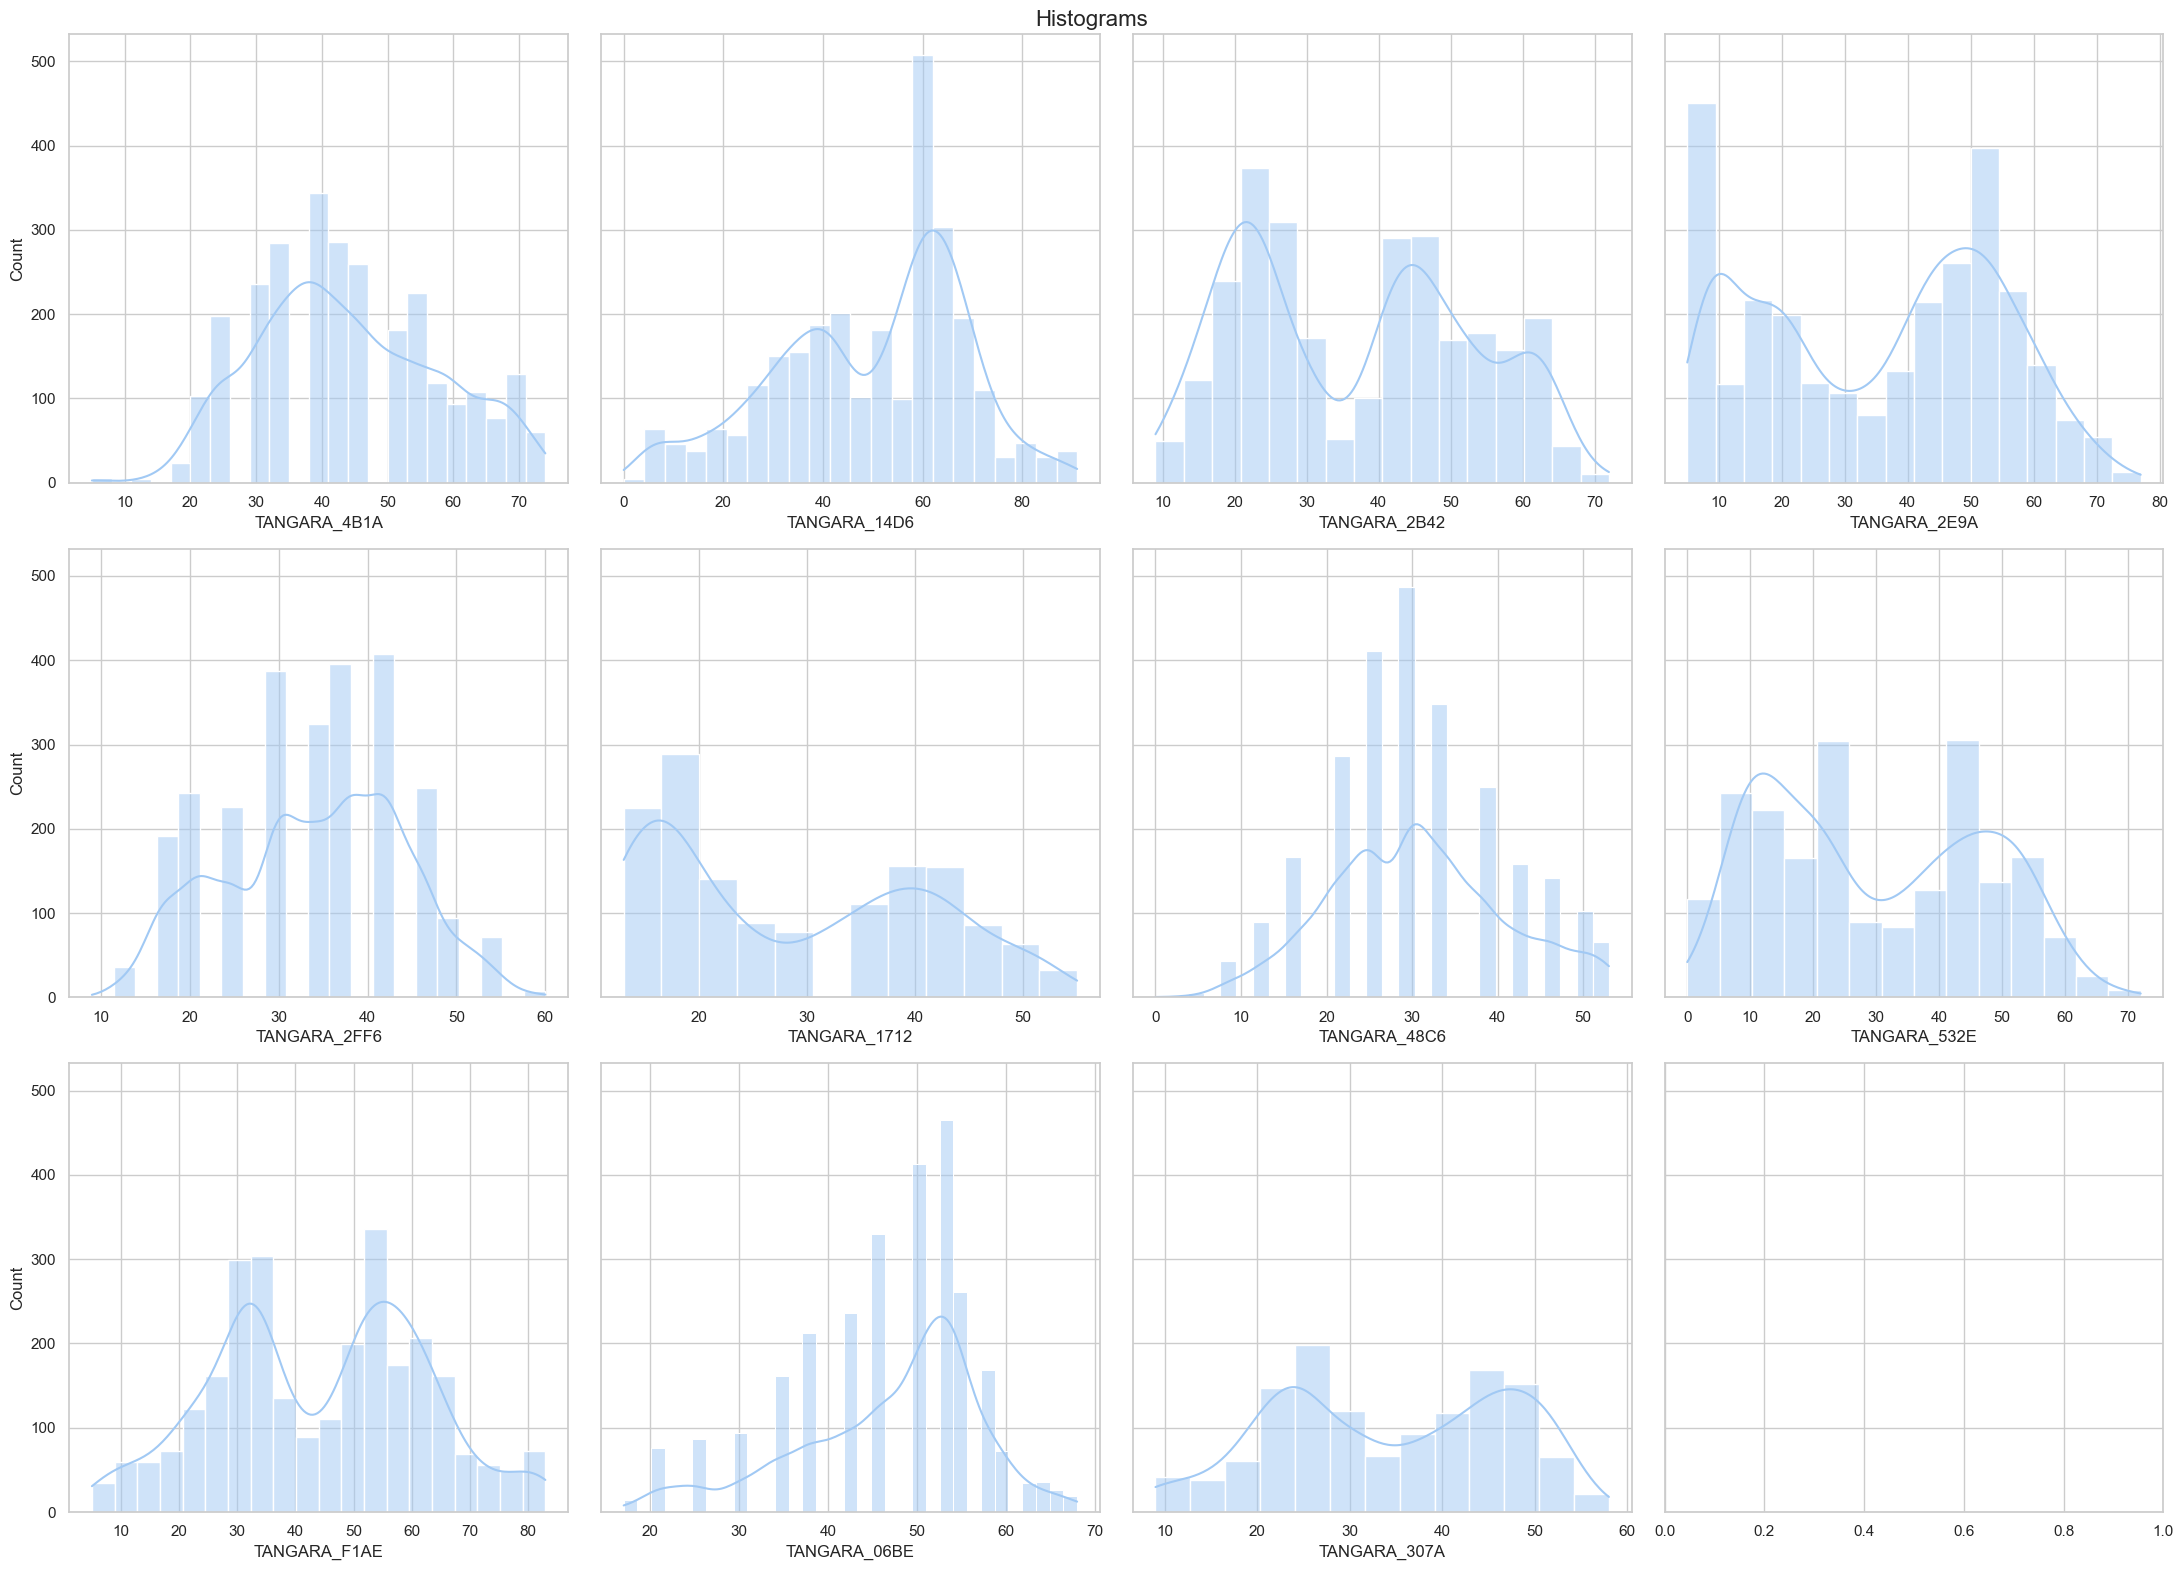

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

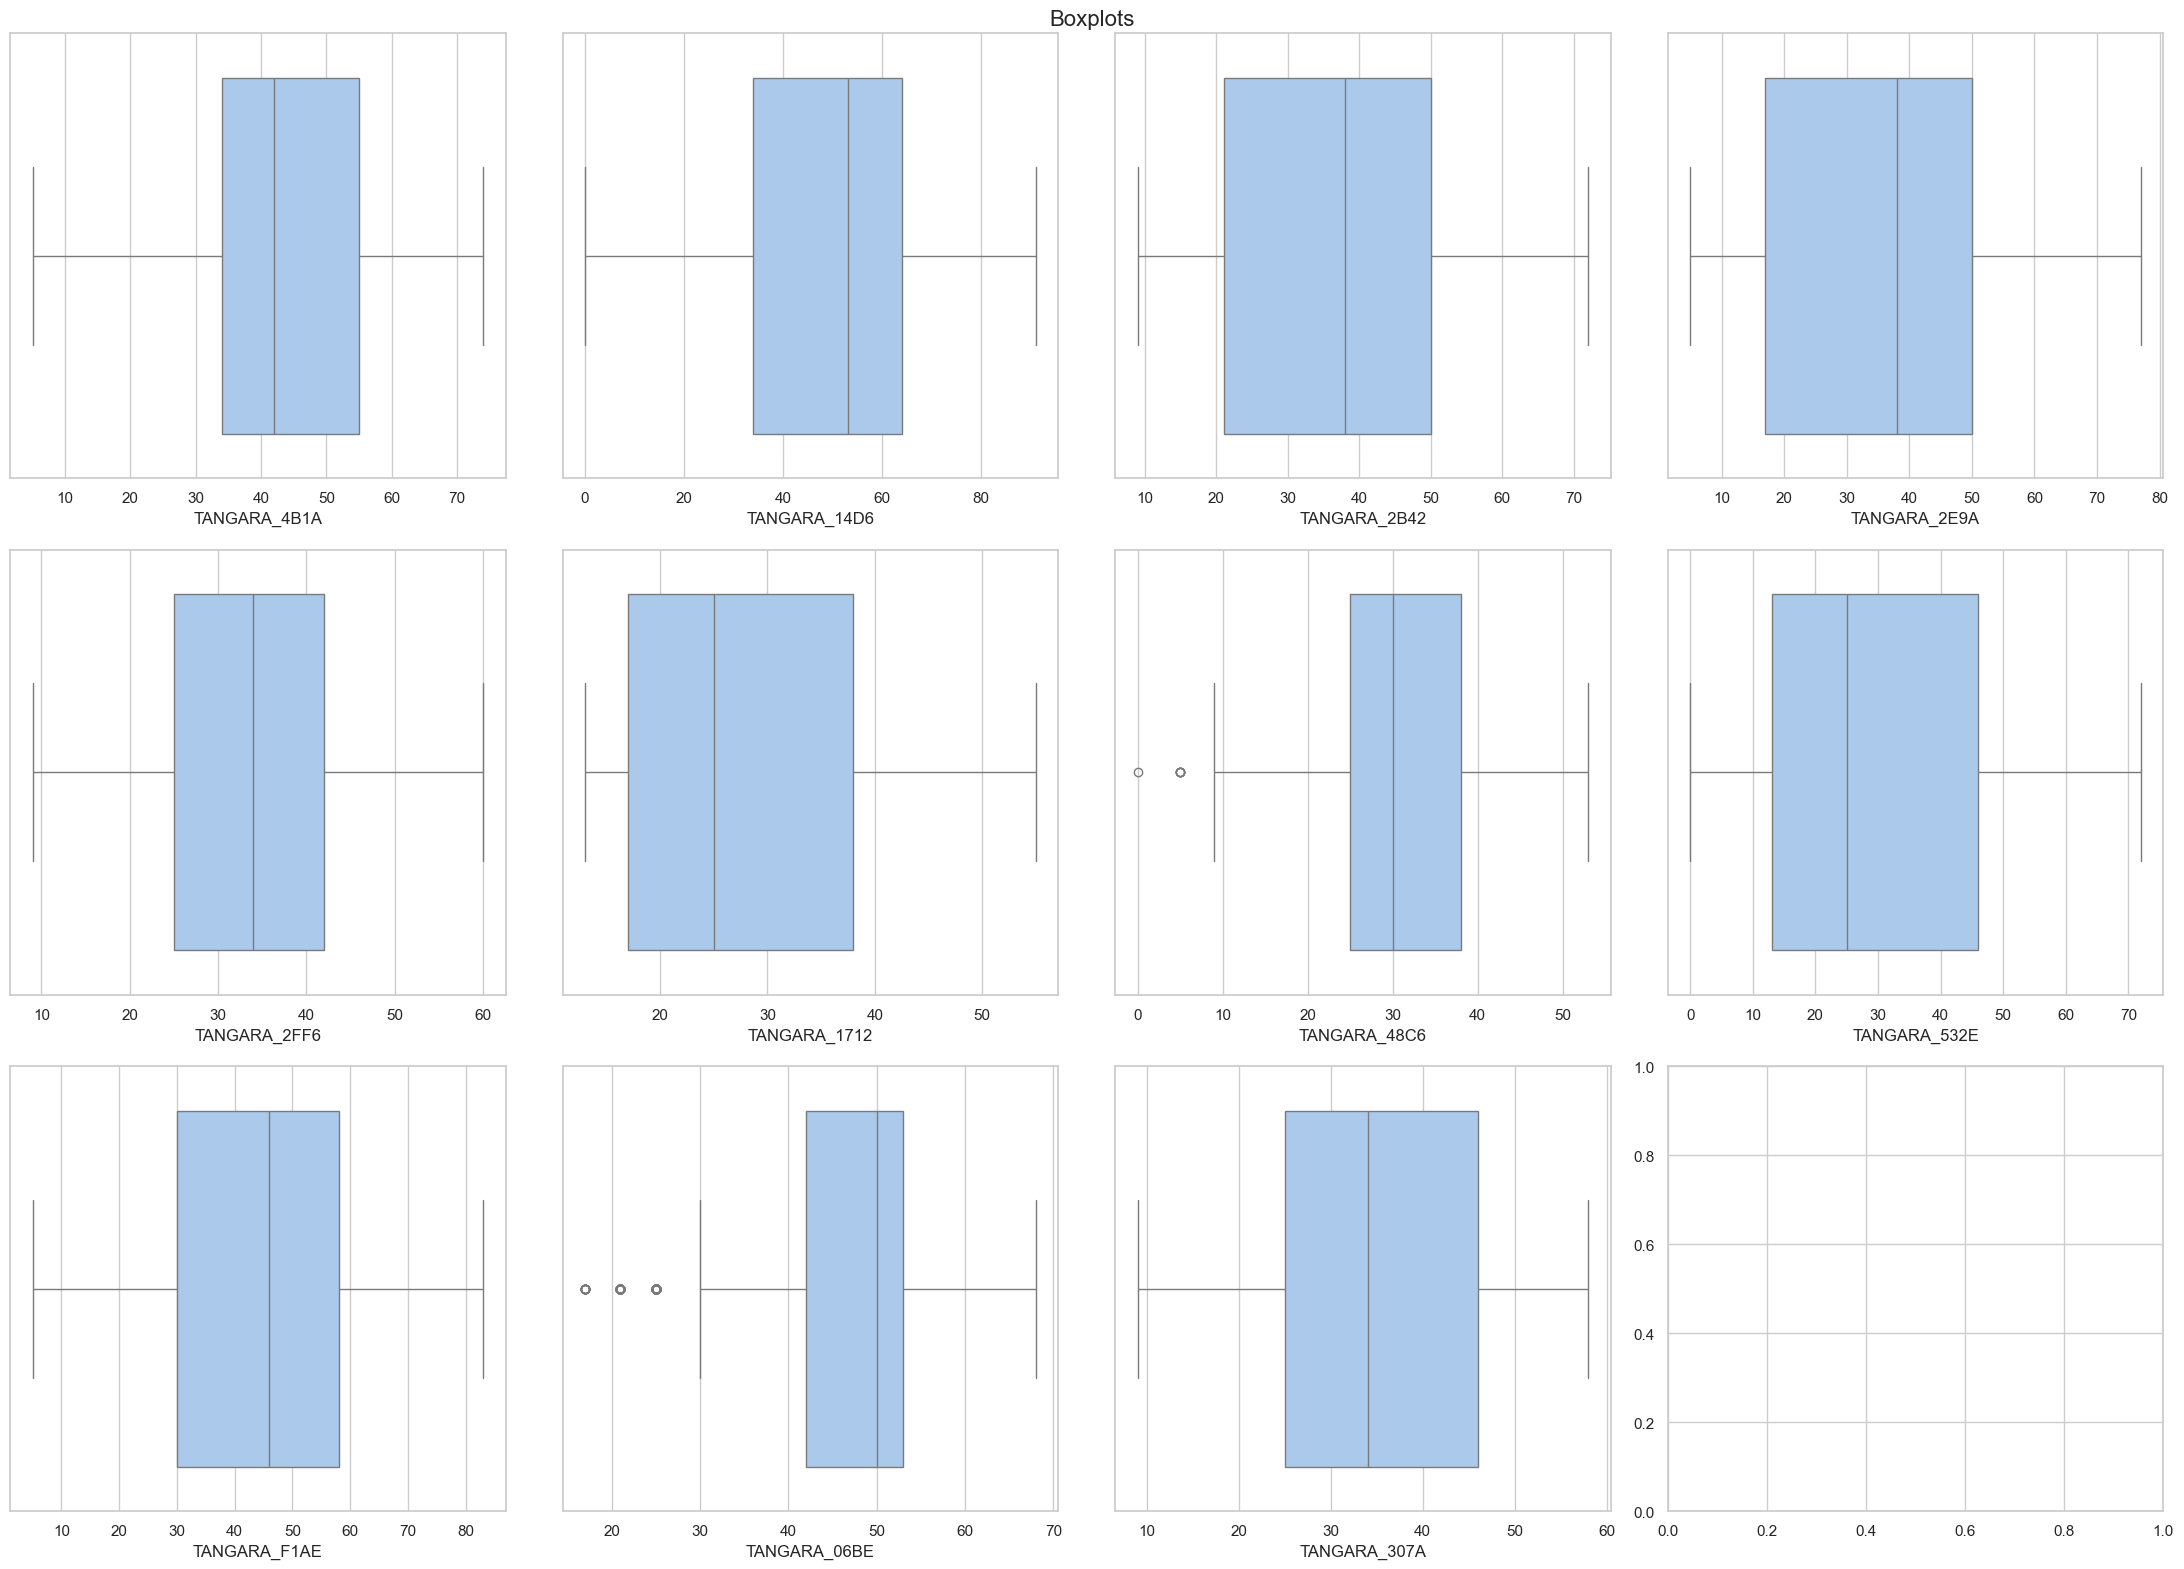

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

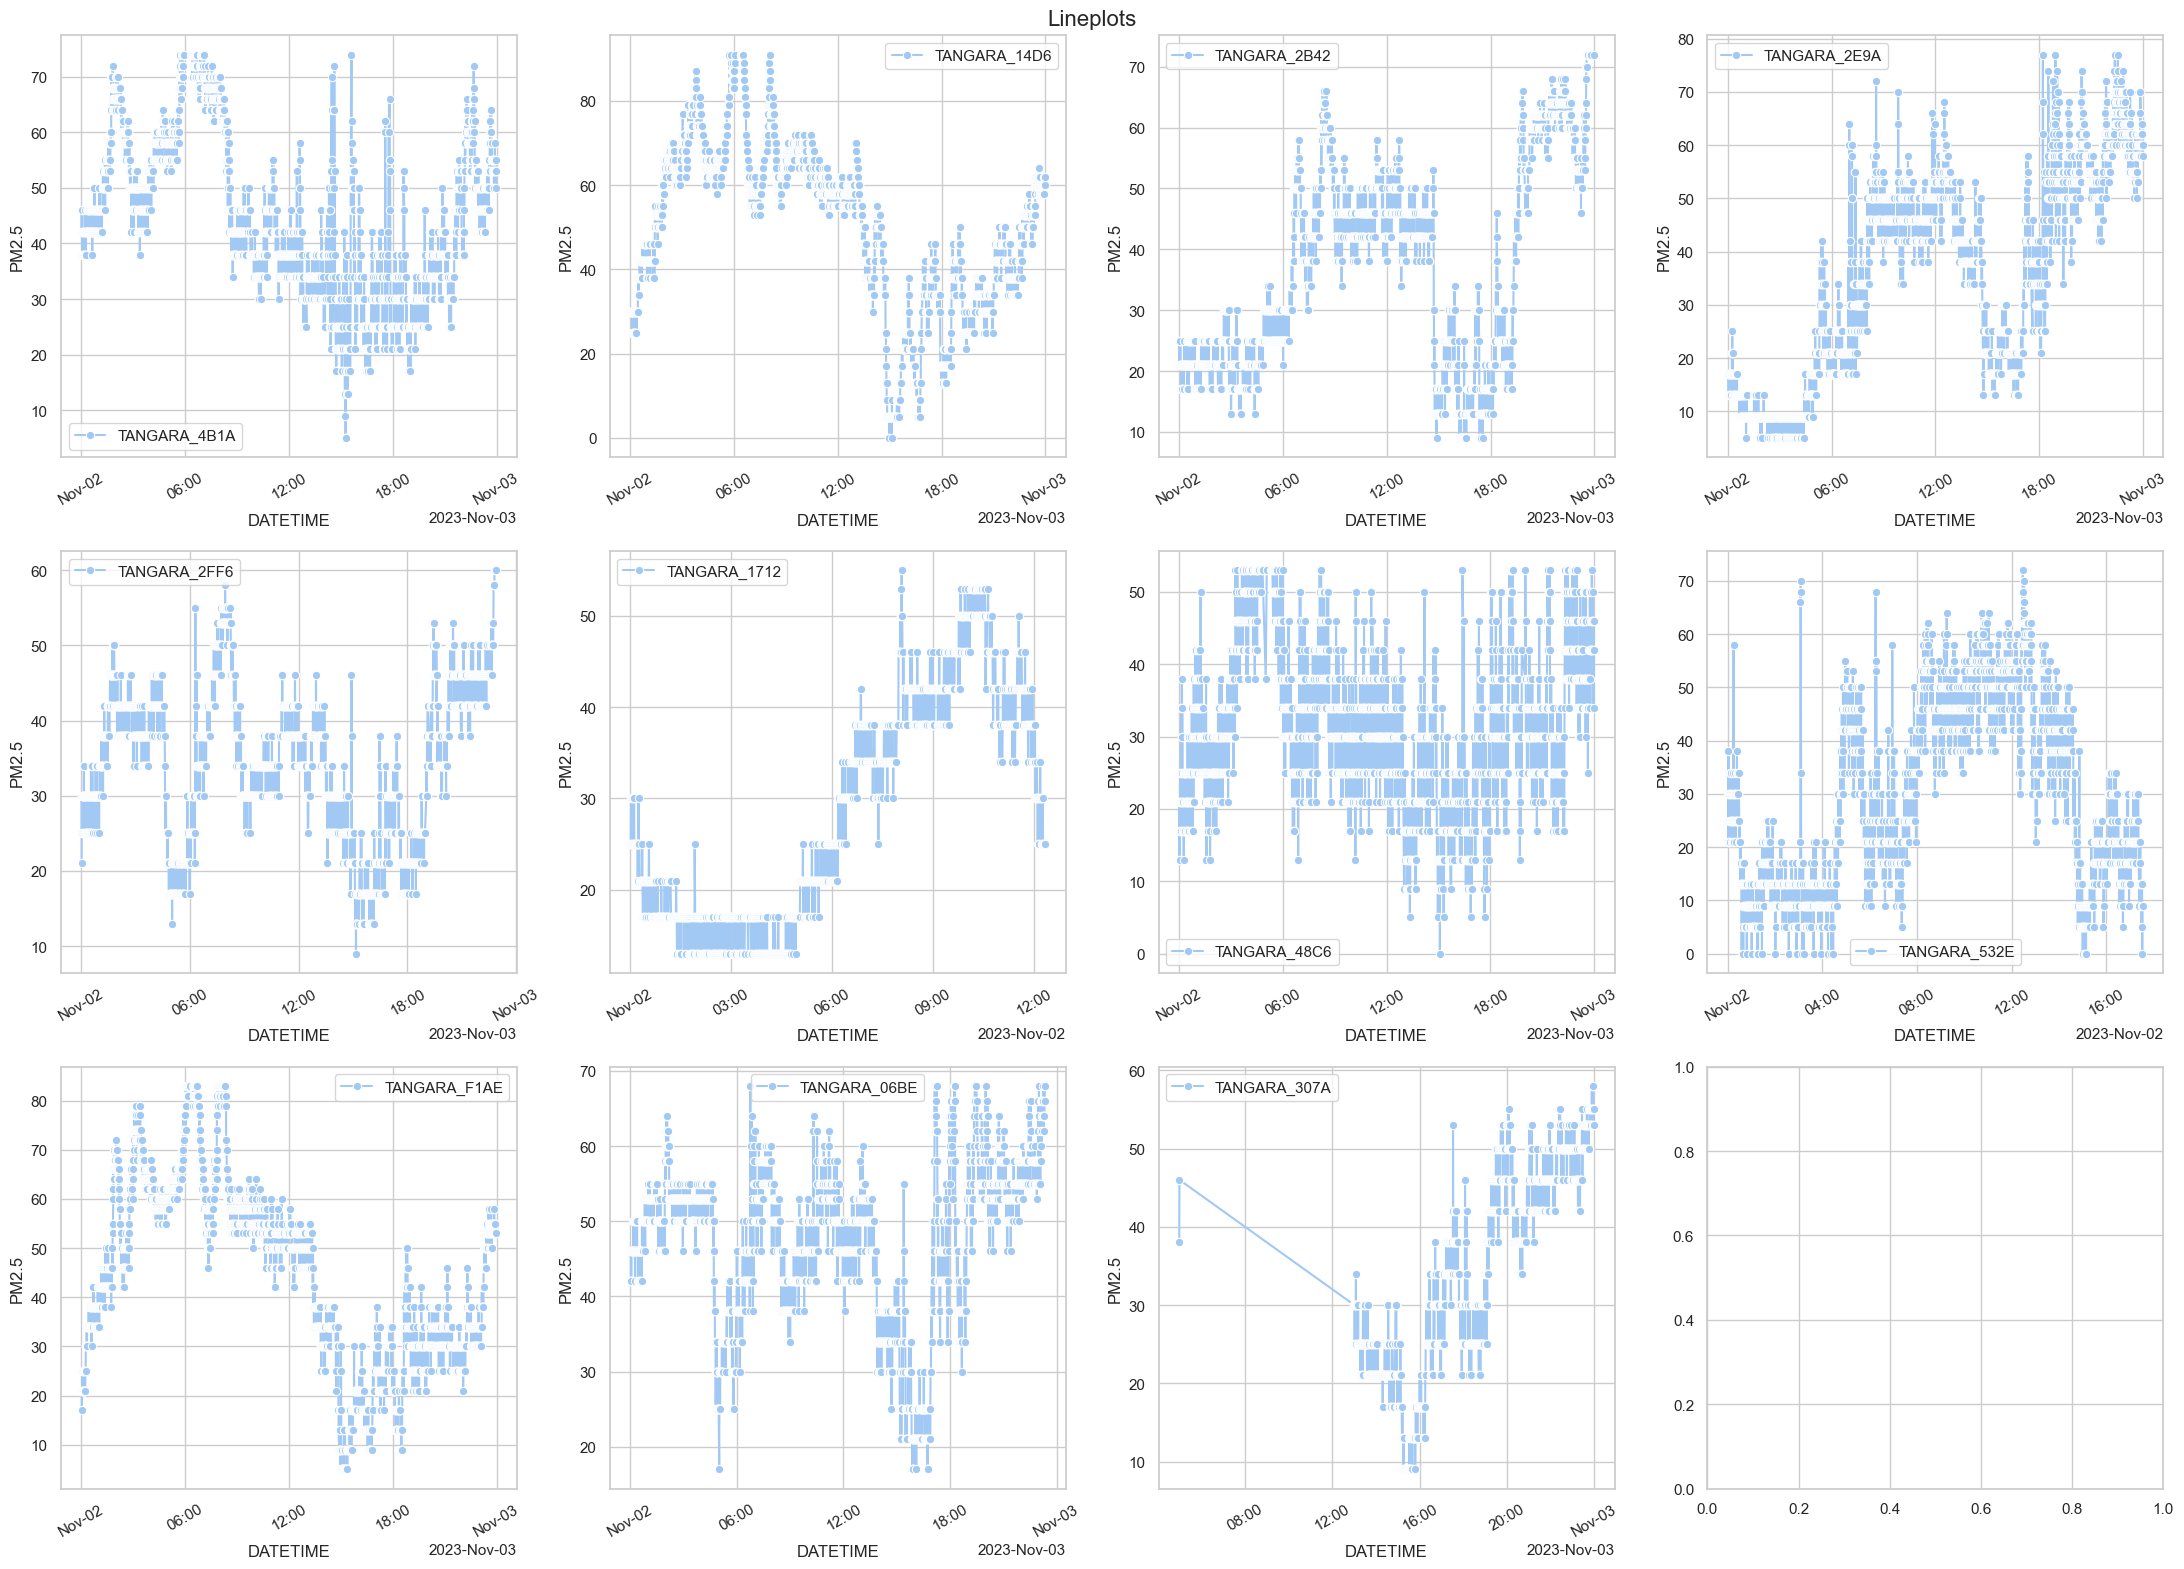

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')